# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import pprint as pprint

#Import API key
import api_keys

from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q="

In [6]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
     
    response = requests.get(f"{url}{city}").json()
    if response["cod"] == 200:  
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    else: 
        print("City not found. Skipping...")

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Matale
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=matale
Processing Record 2 | Ushuaia
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=ushuaia
Processing Record 3 | Barrow
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=barrow
Processing Record 4 | Ierapetra
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=ierapetra
Processing Record 5 | Colares
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=colares
Processing Record 6 | Shimoda
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=shimoda
Processing Record 7 | Provideniya
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=provideniya
Processing Record 8 | Eas

Processing Record 62 | Nanchong
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=nanchong
Processing Record 63 | Baykit
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=baykit
City not found. Skipping...
Processing Record 64 | Nouakchott
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=nouakchott
Processing Record 65 | Prado
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=prado
Processing Record 66 | Isangel
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=isangel
Processing Record 67 | Cadillac
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=cadillac
Processing Record 68 | Necochea
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=necochea
Processing Record 69 | Ancud
https://api.openweat

Processing Record 122 | Arraial do Cabo
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=arraial do cabo
Processing Record 123 | Kununurra
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=kununurra
Processing Record 124 | Riverton
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=riverton
City not found. Skipping...
Processing Record 125 | Bandundu
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=bandundu
Processing Record 126 | Vardablur
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=vardablur
Processing Record 127 | Geraldton
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=geraldton
Processing Record 128 | Port Blair
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=port blair
Processing

Processing Record 182 | Touros
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=touros
Processing Record 183 | Ongandjera
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=ongandjera
Processing Record 184 | Vila Franca do Campo
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=vila franca do campo
Processing Record 185 | Katsuura
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=katsuura
Processing Record 186 | Nehe
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=nehe
Processing Record 187 | Concarneau
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=concarneau
Processing Record 188 | Juneau
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=juneau
City not found. Skipping...
Processing Record 

Processing Record 242 | Constitucion
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=constitucion
Processing Record 243 | La Orilla
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=la orilla
Processing Record 244 | Shaki
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=shaki
Processing Record 245 | Liverpool
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=liverpool
Processing Record 246 | Mount Isa
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=mount isa
Processing Record 247 | San Patricio
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=san patricio
Processing Record 248 | Casma
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=casma
Processing Record 249 | Oriximina
https://api.openwe

City not found. Skipping...
Processing Record 302 | Aquiraz
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=aquiraz
Processing Record 303 | Inhambane
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=inhambane
Processing Record 304 | Bandarbeyla
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=bandarbeyla
Processing Record 305 | Chumikan
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=chumikan
Processing Record 306 | Tamiahua
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=tamiahua
Processing Record 307 | Kaitangata
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=kaitangata
Processing Record 308 | Effium
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=effium
Processing Record 309 | Cidr

Processing Record 362 | Turukhansk
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=turukhansk
Processing Record 363 | Pocao de Pedras
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=pocao de pedras
Processing Record 364 | Osakarovka
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=osakarovka
Processing Record 365 | Chilca
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=chilca
Processing Record 366 | Eyl
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=eyl
Processing Record 367 | Shebunino
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=shebunino
Processing Record 368 | Oranjemund
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=oranjemund
Processing Record 369 | Salalah
https://api.open

Processing Record 422 | San Jeronimito
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=san jeronimito
Processing Record 423 | Port Hedland
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=port hedland
Processing Record 424 | Magadan
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=magadan
Processing Record 425 | Russkaya Polyana
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=russkaya polyana
Processing Record 426 | Beatrice
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=beatrice
Processing Record 427 | Atyrau
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=atyrau
Processing Record 428 | Novoplatnirovskaya
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=novoplatnirovskaya
City not fou

Processing Record 480 | Kilindoni
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=kilindoni
Processing Record 481 | Ambilobe
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=ambilobe
Processing Record 482 | Port Said
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=port said
Processing Record 483 | Chihuahua
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=chihuahua
Processing Record 484 | Menomonie
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=menomonie
Processing Record 485 | Dingle
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=dingle
Processing Record 486 | Novyy Urengoy
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=novyy urengoy
Processing Record 487 | Cobija
https://api.openw

Processing Record 541 | Cornwall
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=cornwall
Processing Record 542 | Sechura
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=sechura
Processing Record 543 | Berezyne
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=berezyne
Processing Record 544 | Takoradi
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=takoradi
Processing Record 545 | Liling
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=liling
Processing Record 546 | Zinder
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=zinder
Processing Record 547 | Marabba
https://api.openweathermap.org/data/2.5/weather?appid=3902c8ece94b4c70667e51faae136b8f&q=&q=marabba
Processing Record 548 | Homer
https://api.openweathermap.org/data/2.5/weat

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

In [8]:
# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

In [9]:
# Display count of weather data values 
weather_data.count()

City          549
Cloudiness    549
Country       549
Date          549
Humidity      549
Lat           549
Lng           549
Max Temp      549
Wind Speed    549
dtype: int64

In [10]:
# Save data frame to CSV
weather_data.to_csv('Output_CSV.to_cities.csv')


In [11]:

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Matale,8,LK,1546922181,68,7.47,80.62,300.411,3.21
1,Ushuaia,75,AR,1546920000,86,-54.81,-68.31,278.150,3.60
2,Barrow,0,AR,1546922183,41,-38.31,-60.23,292.361,6.56
3,Ierapetra,75,GR,1546921200,81,35.01,25.74,279.150,9.30
4,Colares,0,PT,1546920000,60,38.80,-9.45,279.150,1.50


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

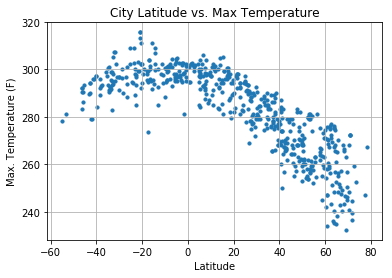

In [21]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save fig
plt.savefig("Output.Plots.MaxTemp.vs.Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

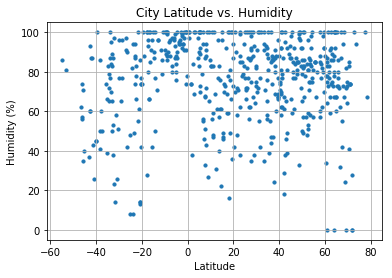

In [22]:
 # Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save fig
plt.savefig("Output.Plots.Humidity.vs.Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

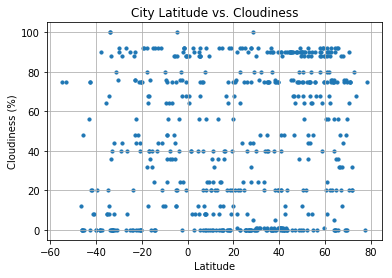

In [23]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save fig
plt.savefig("Output.Plots.Cloudiness.vs.Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

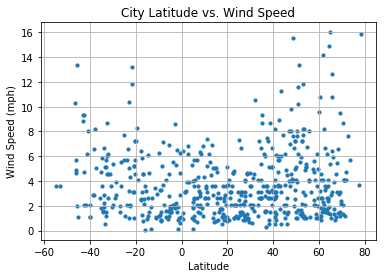

In [24]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save fig
plt.savefig("Output.Plots.WindSpeed.vs.Latitude.png")

# Show plot
plt.show()